In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
risk_data= pd.read_csv(r"C:\Users\brian\Desktop\Springboard\Capstone Two - Project Ideas\Prudential Life Insurance_data_set\train.csv")

In [3]:
risk_data.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [4]:
risk_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 128 columns):
 #    Column               Dtype  
---   ------               -----  
 0    Id                   int64  
 1    Product_Info_1       int64  
 2    Product_Info_2       object 
 3    Product_Info_3       int64  
 4    Product_Info_4       float64
 5    Product_Info_5       int64  
 6    Product_Info_6       int64  
 7    Product_Info_7       int64  
 8    Ins_Age              float64
 9    Ht                   float64
 10   Wt                   float64
 11   BMI                  float64
 12   Employment_Info_1    float64
 13   Employment_Info_2    int64  
 14   Employment_Info_3    int64  
 15   Employment_Info_4    float64
 16   Employment_Info_5    int64  
 17   Employment_Info_6    float64
 18   InsuredInfo_1        int64  
 19   InsuredInfo_2        int64  
 20   InsuredInfo_3        int64  
 21   InsuredInfo_4        int64  
 22   InsuredInfo_5        int64  
 23   InsuredIn

In [5]:
risk_data['Id'].nunique()

59381

In [6]:
df= risk_data.iloc[:, 1:]
dup_col= pd.DataFrame(df)
duplicate = dup_col[dup_col.duplicated(keep = False)]
duplicate.count()

Product_Info_1        58
Product_Info_2        58
Product_Info_3        58
Product_Info_4        58
Product_Info_5        58
                      ..
Medical_Keyword_45    58
Medical_Keyword_46    58
Medical_Keyword_47    58
Medical_Keyword_48    58
Response              58
Length: 127, dtype: int64

<div style="color:blue">It looks like all values in the ID column are unique, so there should be no duplicate rows. I removed the ID column and checked for duplicate rows again just to make sure. Out of 59,381 rows, only 30 are exact duplicates to other rows.</div>

In [7]:
risk_data['Response'].nunique()

8

In [8]:
risk_data['Response'].describe()

count    59381.000000
mean         5.636837
std          2.456833
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max          8.000000
Name: Response, dtype: float64

[]

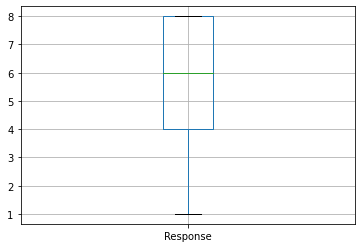

In [9]:
Res_bplot = risk_data.boxplot(column = 'Response') 
Res_bplot.plot()

Text(0.5, 1.0, 'Responce Value Occurrence')

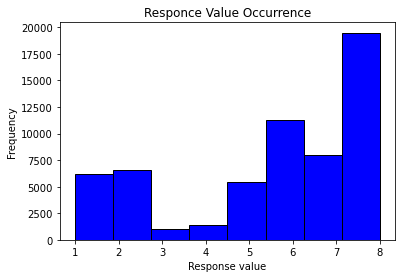

In [10]:
plt.hist(risk_data['Response'], color='blue', edgecolor='black', bins=8)

plt.xlabel('Response value')
plt.ylabel('Frequency')
plt.title('Responce Value Occurrence')

In [11]:
risk_data['Response'].value_counts()[8]

19489

In [35]:
risk_data['Response'].value_counts()[3]

1013

In [12]:
r1 = risk_data['Response'].value_counts()[1]
r2 = risk_data['Response'].value_counts()[2]
r3 = risk_data['Response'].value_counts()[3]
print(r1+r2+r3)

13772


<div style="color:blue">The Response column is the target feature and is a discrete value between 1 and 8.  The numbers are an ordinal measure of risk associated with any particular life insurance application.  The response variable is very unbalanced with around 20k applications associated with response 8. This will defiantly be challenging to classify. </div>


In [13]:
missing1 = pd.concat([risk_data.isnull().sum(), 100 * risk_data.isnull().mean()], axis=1)
missing1.columns=['count', '%']
missing1.sort_values(by='count', ascending = False)

,count,%
Medical_History_10,58824,99.061990
Medical_History_32,58274,98.135767
Medical_History_24,55580,93.598963
Medical_History_15,44596,75.101463
Family_Hist_5,41811,70.411411
...,...,...
Medical_History_6,0,0.000000
Medical_History_5,0,0.000000
Medical_History_4,0,0.000000
Medical_History_3,0,0.000000


In [14]:
missing_sort1 = missing1.query('count > 0')
missing_sort1.sort_values(by = 'count', ascending = False)

,count,%
Medical_History_10,58824,99.061990
Medical_History_32,58274,98.135767
Medical_History_24,55580,93.598963
Medical_History_15,44596,75.101463
Family_Hist_5,41811,70.411411
Family_Hist_3,34241,57.663226
Family_Hist_2,28656,48.257860
Insurance_History_5,25396,42.767889
Family_Hist_4,19184,32.306630
Employment_Info_6,10854,18.278574


In [39]:
missing_sort1['count'].sum()

393103

<AxesSubplot:>

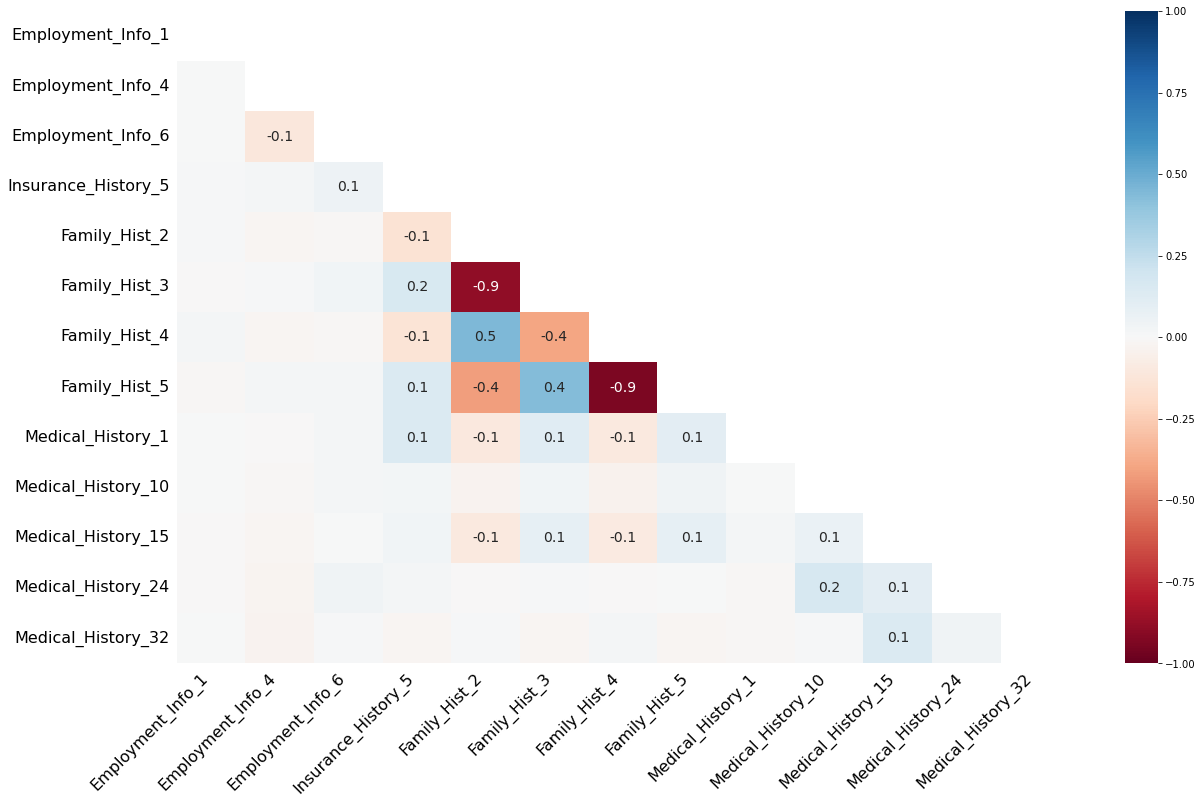

In [15]:
msno.heatmap(risk_data)

In [16]:
risk_data[['Family_Hist_3', 'Family_Hist_2']]

,Family_Hist_3,Family_Hist_2
0,0.598039,NaN
1,NaN,0.188406
2,NaN,0.304348
3,NaN,0.420290
4,NaN,0.463768
...,...,...
59376,NaN,0.217391
59377,NaN,0.565217
59378,NaN,0.173913
59379,0.372549,NaN


In [17]:
temp1 = risk_data.loc[risk_data.Family_Hist_3.isnull(), ['Family_Hist_3', 'Family_Hist_2']]
temp1

,Family_Hist_3,Family_Hist_2
1,NaN,0.188406
2,NaN,0.304348
3,NaN,0.420290
4,NaN,0.463768
6,NaN,0.594203
...,...,...
59374,NaN,0.405797
59375,NaN,NaN
59376,NaN,0.217391
59377,NaN,0.565217


<div style="color:blue">There are a lot of null values in the dataset.  They appear to be multiple choice options in the life insurance application and some are negatively correlated; meaning where one value is present, another is often null. Without knowing what these columns represent, I plan on keeping the null values for now as they may play a part in the risk score (Response column).</div>

In [19]:
with pd.option_context('display.max_rows', 130):
    print(risk_data.describe().T)

                       count          mean           std  min           25%  \
Id                   59381.0  39507.211515  22815.883089  2.0  19780.000000   
Product_Info_1       59381.0      1.026355      0.160191  1.0      1.000000   
Product_Info_3       59381.0     24.415655      5.072885  1.0     26.000000   
Product_Info_4       59381.0      0.328952      0.282562  0.0      0.076923   
Product_Info_5       59381.0      2.006955      0.083107  2.0      2.000000   
Product_Info_6       59381.0      2.673599      0.739103  1.0      3.000000   
Product_Info_7       59381.0      1.043583      0.291949  1.0      1.000000   
Ins_Age              59381.0      0.405567      0.197190  0.0      0.238806   
Ht                   59381.0      0.707283      0.074239  0.0      0.654545   
Wt                   59381.0      0.292587      0.089037  0.0      0.225941   
BMI                  59381.0      0.469462      0.122213  0.0      0.385517   
Employment_Info_1    59362.0      0.077582      0.08

In [48]:
risk_data[risk_data['Ht'] == 0 ]

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
36117,47965,1,D2,26,0.179487,2,1,1,0.58209,0.0,...,0,0,0,0,0,0,0,1,0,2


In [49]:
risk_data[risk_data['Ins_Age'] == 0 ]

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
197,266,1,D1,26,0.076923,2,3,1,0.0,0.636364,...,0,0,0,0,0,0,0,0,0,4
431,589,1,A1,37,0.230769,2,3,1,0.0,0.636364,...,0,0,0,0,0,0,0,0,0,7
502,688,1,A1,26,0.179487,2,3,1,0.0,0.672727,...,0,0,0,0,0,0,0,0,0,6
558,763,1,E1,26,1.000000,2,3,1,0.0,0.600000,...,0,0,0,0,0,0,0,0,0,8
576,787,1,D4,26,0.076923,2,1,1,0.0,0.600000,...,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58549,78052,1,A1,31,0.076923,2,3,1,0.0,0.727273,...,0,0,0,0,0,0,0,0,0,8
58617,78140,1,A8,26,0.025641,2,3,1,0.0,0.781818,...,0,0,0,0,0,0,0,0,0,5
58618,78141,1,D4,26,0.076923,2,3,1,0.0,0.636364,...,1,0,0,0,0,0,0,0,0,5
58836,78448,2,E1,31,0.230769,2,3,1,0.0,0.727273,...,0,0,0,0,0,0,0,0,0,6


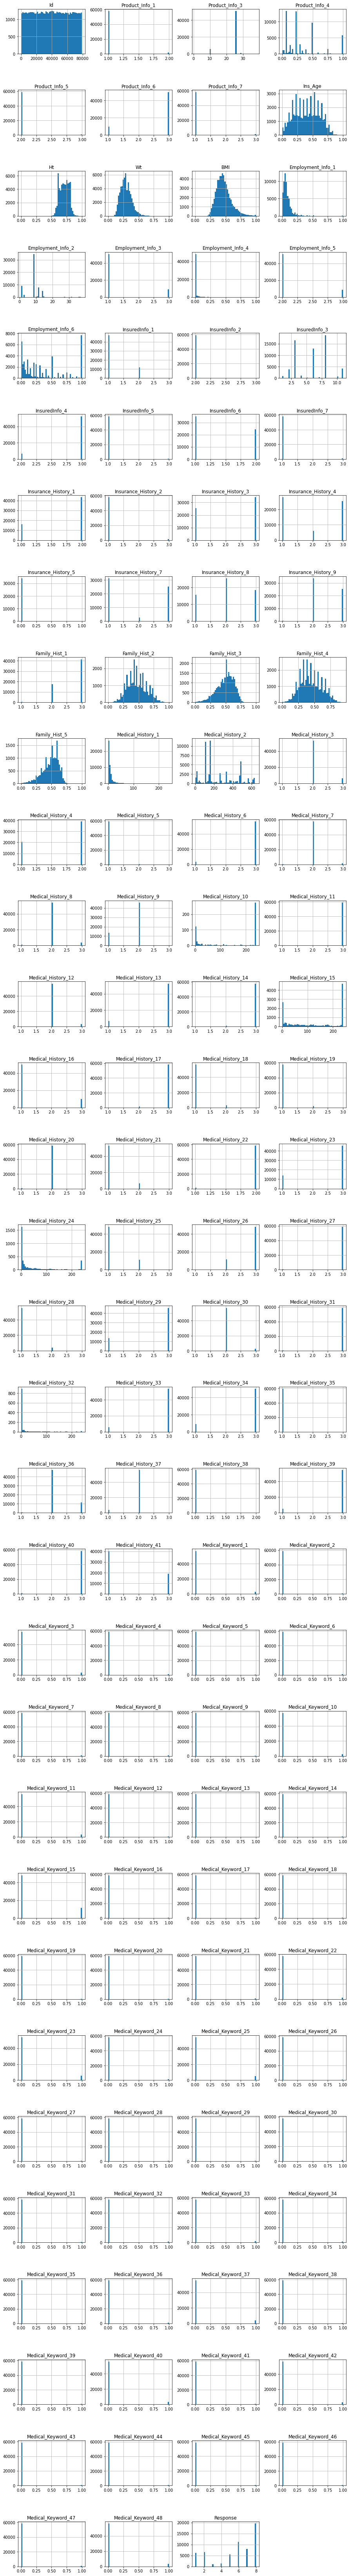

In [20]:
risk_data.hist(figsize=(15,120), bins=50, layout= (32,4))
plt.subplots_adjust(hspace=0.8)

In [21]:
col_val_two = risk_data.nunique()[lambda x: x == 2]
col_val_two.count()

63

In [22]:
col_val_three = risk_data.nunique()[lambda x: x == 3]
col_val_three.count()

40

In [29]:
int_risk_data = risk_data.select_dtypes(include = 'int64')
int_risk_data.nunique()[lambda x: x > 3]

Id                   59381
Product_Info_3          34
Employment_Info_2       36
InsuredInfo_3           11
Medical_History_2      579
Response                 8
dtype: int64

<div style="color:blue">It looks like 64 of the columns have 2 distinct value options, and 40 have 3 distinct values. These may be multiple choice questions with 2 and 3 options only. I looks like these numbers are discrete. There are 6 remaining int64 columns that have a wider range of unique values.</div>

In [23]:
risk_data['Product_Info_2'].nunique()

19

In [24]:
points = risk_data['Product_Info_2'].unique()
points.sort()
points

array(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'B1', 'B2', 'C1',
       'C2', 'C3', 'C4', 'D1', 'D2', 'D3', 'D4', 'E1'], dtype=object)

<div style="color:blue"> Product_Info_2 is a categorical variable in the dataset and has 19 unique options. It appears to be a code for the type of insurance the applicant is requesting.</div>

In [30]:
float_risk_data = risk_data.select_dtypes(include = 'float64')
float_risk_data

,Product_Info_4,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_4,Employment_Info_6,Insurance_History_5,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_10,Medical_History_15,Medical_History_24,Medical_History_32
0,0.076923,0.641791,0.581818,0.148536,0.323008,0.028,0.00000,NaN,0.000667,NaN,0.598039,NaN,0.526786,4.0,NaN,240.0,NaN,NaN
1,0.076923,0.059701,0.600000,0.131799,0.272288,0.000,0.00000,0.0018,0.000133,0.188406,NaN,0.084507,NaN,5.0,NaN,0.0,NaN,NaN
2,0.076923,0.029851,0.745455,0.288703,0.428780,0.030,0.00000,0.0300,NaN,0.304348,NaN,0.225352,NaN,10.0,NaN,NaN,NaN,NaN
3,0.487179,0.164179,0.672727,0.205021,0.352438,0.042,0.00000,0.2000,NaN,0.420290,NaN,0.352113,NaN,0.0,NaN,NaN,NaN,NaN
4,0.230769,0.417910,0.654545,0.234310,0.424046,0.027,0.00000,0.0500,NaN,0.463768,NaN,0.408451,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,0.230769,0.074627,0.709091,0.320084,0.519103,0.020,0.00000,0.0250,NaN,0.217391,NaN,0.197183,NaN,0.0,NaN,32.0,NaN,NaN
59377,0.230769,0.432836,0.800000,0.403766,0.551119,0.100,0.00001,0.3500,0.000267,0.565217,NaN,0.478873,NaN,24.0,NaN,NaN,NaN,NaN
59378,0.076923,0.104478,0.745455,0.246862,0.360969,0.035,0.00000,NaN,NaN,0.173913,NaN,0.126761,NaN,NaN,NaN,NaN,NaN,NaN
59379,0.230769,0.507463,0.690909,0.276151,0.462452,0.038,NaN,NaN,NaN,NaN,0.372549,0.704225,NaN,0.0,NaN,240.0,NaN,NaN


In [31]:
float_risk_data.describe()

,Product_Info_4,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_4,Employment_Info_6,Insurance_History_5,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_10,Medical_History_15,Medical_History_24,Medical_History_32
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59362.000000,52602.000000,48527.000000,33985.000000,30725.000000,25140.000000,40197.000000,17570.000000,50492.000000,557.000000,14785.000000,3801.000000,1107.000000
mean,0.328952,0.405567,0.707283,0.292587,0.469462,0.077582,0.006283,0.361469,0.001733,0.474550,0.497737,0.444890,0.484635,7.962172,141.118492,123.760974,50.635622,11.965673
std,0.282562,0.197190,0.074239,0.089037,0.122213,0.082347,0.032816,0.349551,0.007338,0.154959,0.140187,0.163012,0.129200,13.027697,107.759559,98.516206,78.149069,38.718774
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076923,0.238806,0.654545,0.225941,0.385517,0.035000,0.000000,0.060000,0.000400,0.362319,0.401961,0.323944,0.401786,2.000000,8.000000,17.000000,1.000000,0.000000
50%,0.230769,0.402985,0.709091,0.288703,0.451349,0.060000,0.000000,0.250000,0.000973,0.463768,0.519608,0.422535,0.508929,4.000000,229.000000,117.000000,8.000000,0.000000
75%,0.487179,0.567164,0.763636,0.345188,0.532858,0.100000,0.000000,0.550000,0.002000,0.579710,0.598039,0.563380,0.580357,9.000000,240.000000,240.000000,64.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.943662,1.000000,240.000000,240.000000,240.000000,240.000000,240.000000


In [32]:
float_risk_data.nunique()

Product_Info_4         1491
Ins_Age                  65
Ht                       39
Wt                      300
BMI                    3256
Employment_Info_1      1936
Employment_Info_4       871
Employment_Info_6       992
Insurance_History_5    2265
Family_Hist_2            68
Family_Hist_3            90
Family_Hist_4            68
Family_Hist_5            90
Medical_History_1       171
Medical_History_10      103
Medical_History_15      241
Medical_History_24      227
Medical_History_32       95
dtype: int64

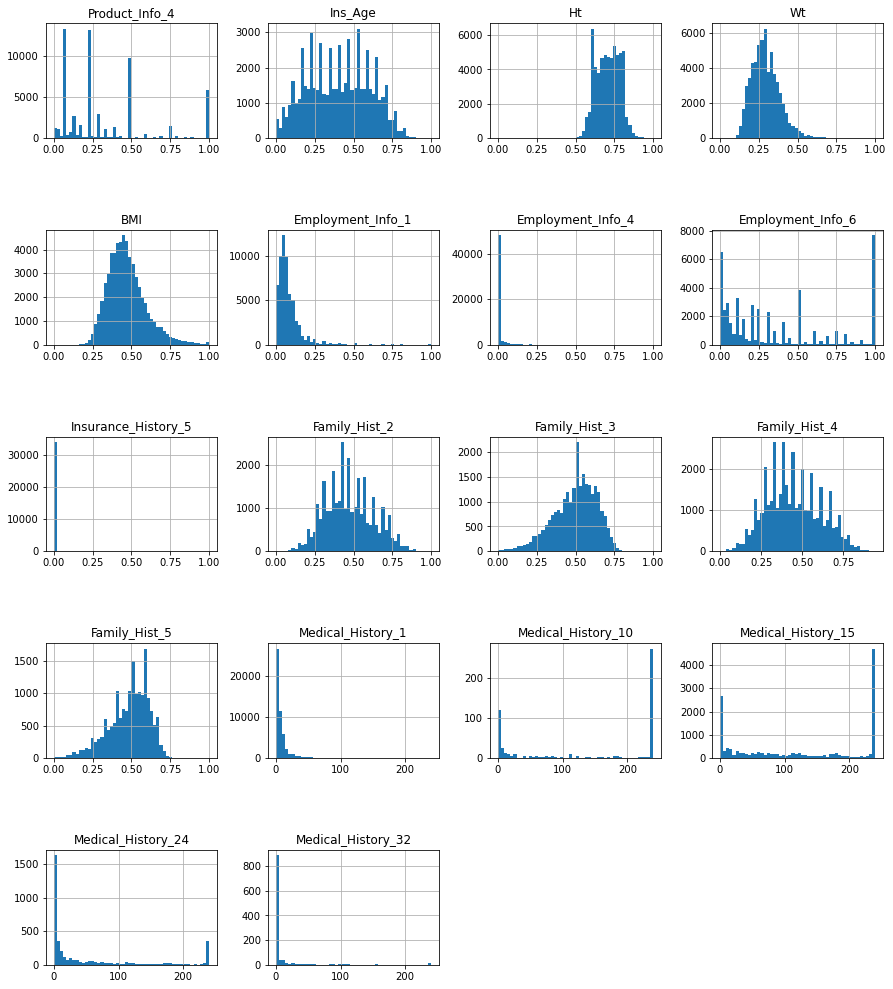

In [41]:
float_risk_data.hist(figsize=(15,120), bins=50, layout= (32,4))
plt.subplots_adjust(hspace=0.8)

<div style="color:blue">
Data Wrangling Summary Statement:
    
Out of the 128 columns, 109 have int64 values. Among these, 63 columns offer a selection of two discrete numbers, while 40 columns have a selection of three discrete numbers. Additionally, there is a categorical variable called 'Product_info_2' with 19 distinct options for life insurance selection. The remaining 18 columns contain float64 values with a range of unique values between 39 and 3256.

The dataset is generally clean, well-organized, and has not undergone any changes thus far. There are five columns with missing data ranging from 70% to 99%, which may be dropped later if they show no correlation with the 'Response' variable. In total, there are 393,103 NaN values in the dataset. For now, these NaN values have been retained after observing a negative correlation pattern (where one value is present, the correlated value is absent) through a heat map analysis.

Overall, there is a good understanding of the dataset's characteristics. The next step involves conducting exploratory analysis to examine the relationship between column values and the 'Response' column. Based on the findings, certain rows or columns may be removed if they appear irrelevant to the analysis.

 </div>
